# 针对Titanic数据集的数据探索分析与预处理
# 1. 数据集介绍
**Titanic**数据集来自Kaggle竞赛平台的入门项目[Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/overview)，数据记录了泰坦尼克号处女航撞上冰山沉没北大西洋时，不同年龄、性别和社会地位的乘客及船员的生存情况。数据经过适当的探索分析和预处理后，可开展泰坦尼克号乘客生存预测。数据字段及具体含义如下：

- PassengerId: ID
- Survived: Survival status: 0 = No, 1 = Yes
- Pclass: Ticket class: 1 = 1st (Upper), 2 = 2nd (Middle), 3 = 3rd (Lower)
- Name: e.g., "Braund, Mr. Owen Harris"
- Sex: "female" or "male"
- Age: Age in years
- SibSp: # of siblings / spouses aboard the Titanic
- Parch: # of parents / children aboard the Titanic
- Ticket: Ticket number
- Fare: Passenger fare
- Cabin: Cabin number
- Embarked: Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

# 2. 数据探索分析与预处理
## 2.1 导入数据

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('./titanic.csv')
print('数据集: ', data.shape)

数据集:  (1309, 12)


## 2.2 查看数据
查看数据导入情况

In [2]:
# 查看前5行
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 查看后5行
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,1,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [4]:
#查看数据维度
data.shape

(1309, 12)

In [5]:
# 浏览数据集整体情况
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [6]:
# 查看数据集统计信息
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.381971,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486055,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


## 2.3 检查数据质量
针对数据可能存在的“不完整、不正确、不一致”问题，重点检查以下几个维度：<br>
* 不完整：查看缺失值；<br>
* 不正确：查看异常点和噪音；<br>
* 不一致：主要检查文本字段质量。<br>

In [7]:
#查看数据缺失情况
data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

发现：Age和Cabin字段存在较多的数据缺失，Age字段可以尝试一定的缺失值补全，Cabin字段由于缺失值过多可以考虑删去。

<Axes: xlabel='Survived', ylabel='Age'>

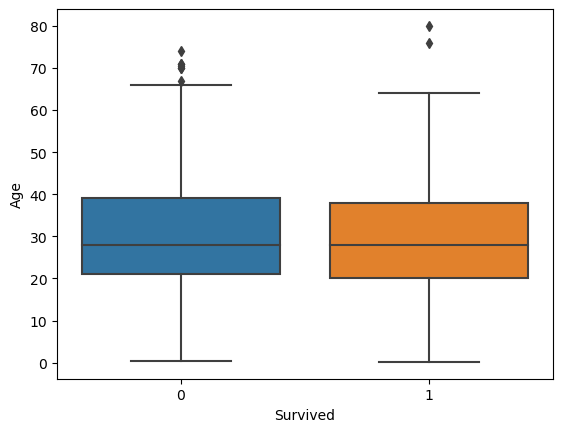

In [8]:
# 使用箱线图刻画Age变量的分布，查看异常点
import seaborn as sns
sns.boxplot(x = 'Survived', y ='Age', data = data)

发现：1）数据集中乘客平均年龄在30岁左右；2）数据集中乘客年龄存在异常点（高龄乘客）。3)平均而言，幸存者相对更年轻。

## 2.4 数据清洗
针对Titanic数据集，主要进行缺失值填充策略的探索。 <br>
1. 使用特定值（如均值、众数）填充缺失值

In [9]:
# 均值填充
# Age
print('年龄均值：', data['Age'].mean())
data['Age'] = data['Age'].fillna(data['Age'].mean())
# Fare
print('旅客票价均值：', data['Fare'].mean())
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

年龄均值： 29.881137667304014
旅客票价均值： 33.29547928134557


In [10]:
# 众数填充
# Embarked
print(data['Embarked'].value_counts())
data['Embarked'] = data['Embarked'].fillna('S')

S    914
C    270
Q    123
Name: Embarked, dtype: int64


2. 基于近邻推断填充缺失值<br>
[sklearn.impute.KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer)类能提供基于K近邻推断填补缺失值的方法。基本思路是<br>1）基于其他未缺失值计算K近邻；2）利用K近邻对缺失字段的值进行推断，如加权平均。 <br>注意：该方法只能处理数值属性；

In [11]:
from sklearn.impute import KNNImputer
#select the numeric columns and transform it to numpy
data_numeric = data[['Age', 'SibSp', 'Parch', 'Fare']].to_numpy() 
imputer = KNNImputer(n_neighbors = 4, weights = "uniform")
data_numeric_impute = imputer.fit_transform(data_numeric)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


3. 其他缺失值处理方法，可以查看[链接](https://scikit-learn.org/stable/modules/preprocessing.html#imputation-of-missing-values)

## 2.5 离散属性编码
1. 对Sex根据指定的map进行0-1编码

In [13]:
# Sex
data['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [14]:
# Sex
Sex_map = {
    'female': 0,
    'male': 1
}
data['Sex'] = data['Sex'].map(Sex_map)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


2. 对变量Embarked(登船港口)进行编码

In [15]:
data = data.join(pd.get_dummies(data['Embarked'], prefix = 'Embarked'))
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,0,1


3. 对变量Pclass(船票等级)进行编码

In [16]:
data = data.join(pd.get_dummies(data['Pclass'], prefix = 'Pclass'))
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,0,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,1


## 2.6 数据转换
基于数据集已有属性和挖掘任务，有针对性地创建新的属性。
1. 提取变量Name中的头衔并编码

In [17]:
def get_title(name):
    str1 = name.split(',')[1]
    str2 = str1.split('.')[0]
    str3 = str2.strip()
    return str3

data['Title'] = data['Name'].map(get_title)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,0,1,1,0,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,1,Mr


In [18]:
data['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

变量Title中部分头衔并不常见，因此进行汇总处理，得到共6类，分别是Officer, Royalty, Mrs, Miss, Mr, Master

In [19]:
Title_map = {
    'Mr': 'Mr',
    'Miss': 'Miss',
    'Mrs': 'Mrs',
    'Master': 'Master',
    'Rev': 'Officer',
    'Dr': 'Officer',
    'Col': 'Officer',
    'Ms': 'Mrs',
    'Mlle': 'Miss',
    'Major': 'Officer',
    'Dona': 'Royalty',
    'Sir': 'Royalty',
    'Capt': 'Officer',
    'the Countess': 'Royalty',
    'Don': 'Royalty',
    'Lady': 'Royalty',
    'Mme': 'Mrs',
    'Jonkheer': 'Royalty'
}
data['Title'] = data['Title'].map(Title_map)
data['Title'].value_counts()
data = data.join(pd.get_dummies(data['Title'], prefix = 'Title'))

2. 基于变量SibSp和Parch计算家庭规模数据

In [20]:
data['Family'] = data['SibSp'] + data['Parch'] + 1
data['FamilySingle'] = data['Family'].map(lambda a:1 if a == 1 else 0)
data['FamilySmall'] = data['Family'].map(lambda a:1 if 2 <= a <= 4 else 0)
data['FamilyLarge'] = data['Family'].map(lambda a:1 if 5 <= a else 0)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Family,FamilySingle,FamilySmall,FamilyLarge
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,0,0,1,0,0,0,2,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0,0,0,1,0,0,2,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,0,0,0,0,1,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,0,0,0,1,0,0,2,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,0,0,1,0,0,0,1,1,0,0


3. 查看数据分布

In [21]:
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
graph_by_variables = data.columns
print(graph_by_variables.to_list())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Title', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty', 'Family', 'FamilySingle', 'FamilySmall', 'FamilyLarge']


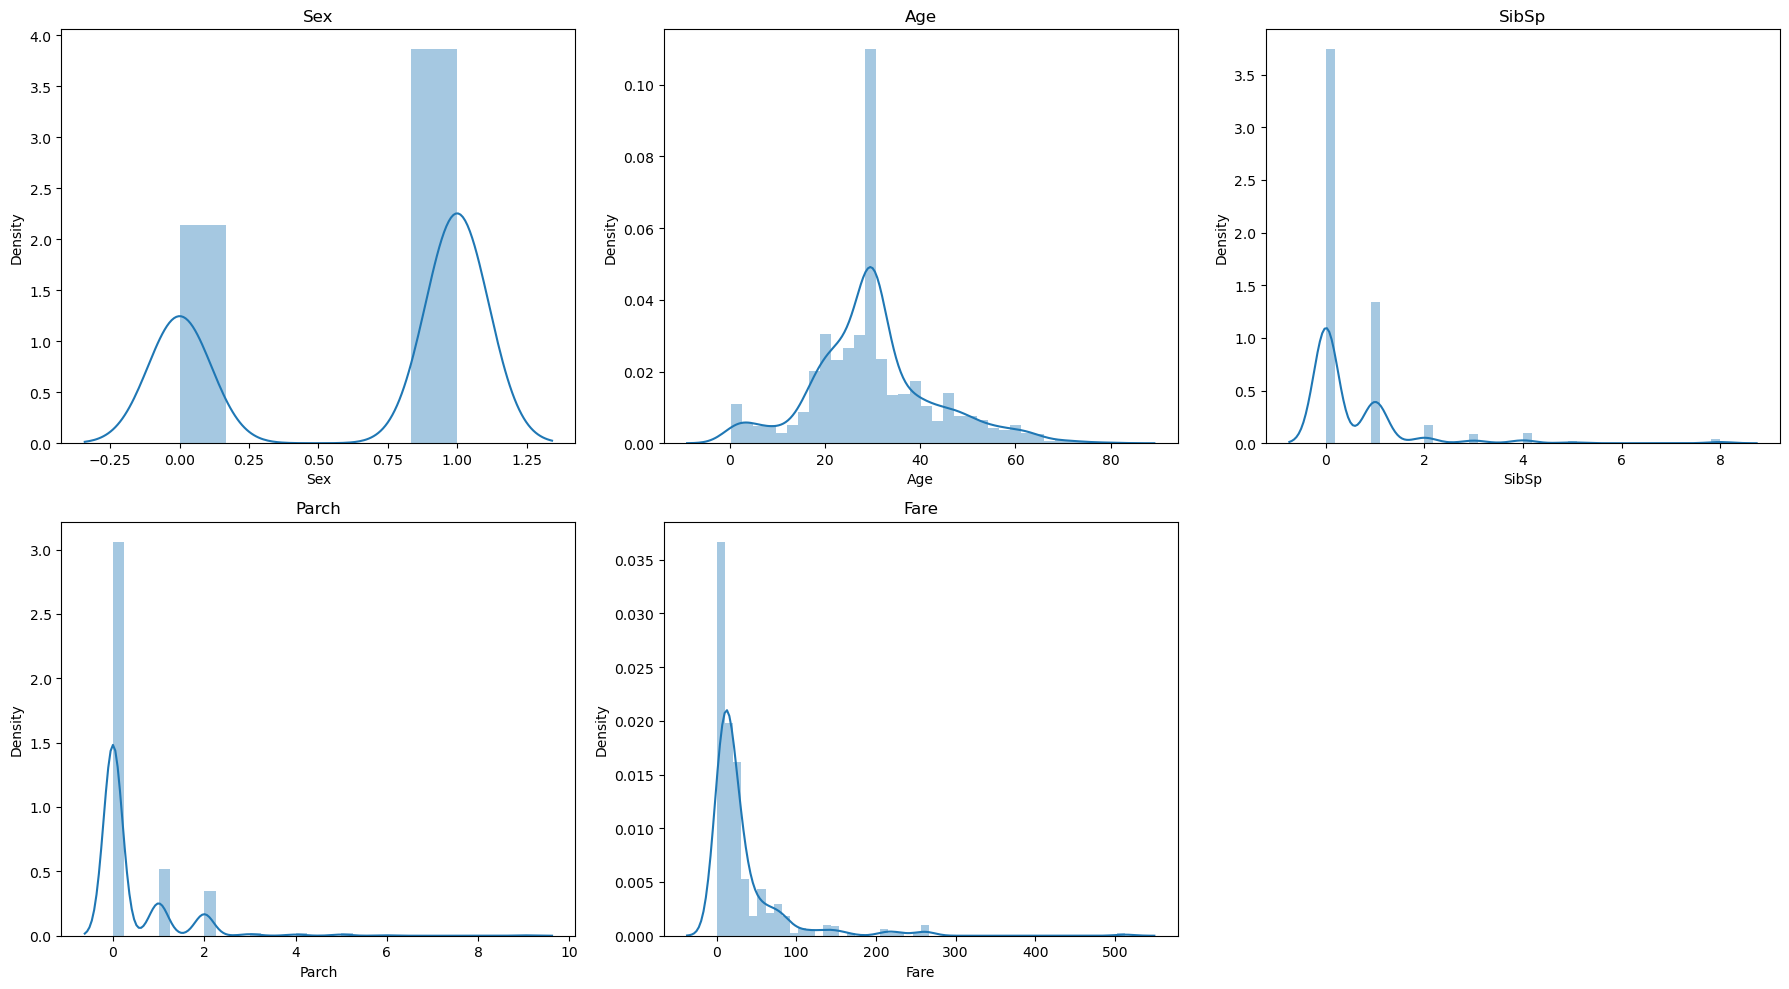

In [22]:
graph_by_variables_s = graph_by_variables[[4,5,6,7,9,26]]
plt.figure(figsize = (18, 10))
for i in range(0, 5):
    plt.subplot(2, 3, i+1)
    sns.distplot(data[graph_by_variables_s[i]])
    plt.title(graph_by_variables_s[i])
plt.tight_layout()

## 2.6 数据标准化
可以利用sklearn.preprocessing包实现数据标准化操作。其中，[StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)可用来做正态标准化，[MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler)可用来做最小最大标准化。<br>

In [23]:
#选取range不在[0,1]的变量
print(data.describe())
data_r = data[['Age', 'SibSp', 'Parch', 'Fare', 'Family']]

       PassengerId     Survived       Pclass          Sex          Age  \
count  1309.000000  1309.000000  1309.000000  1309.000000  1309.000000   
mean    655.000000     0.381971     2.294882     0.644003    29.881138   
std     378.020061     0.486055     0.837836     0.478997    12.883193   
min       1.000000     0.000000     1.000000     0.000000     0.170000   
25%     328.000000     0.000000     2.000000     0.000000    22.000000   
50%     655.000000     0.000000     3.000000     1.000000    29.881138   
75%     982.000000     1.000000     3.000000     1.000000    35.000000   
max    1309.000000     1.000000     3.000000     1.000000    80.000000   

             SibSp        Parch         Fare   Embarked_C   Embarked_Q  ...  \
count  1309.000000  1309.000000  1309.000000  1309.000000  1309.000000  ...   
mean      0.498854     0.385027    33.295479     0.206264     0.093965  ...   
std       1.041658     0.865560    51.738879     0.404777     0.291891  ...   
min       0.00000

In [24]:
#正态标准化
from sklearn import preprocessing
z_scaler = preprocessing.StandardScaler().fit(data_r)
print('mean:', z_scaler.mean_)
print('std:', z_scaler.scale_)
print(z_scaler.transform(data_r))

mean: [29.88113767  0.49885409  0.38502674 33.29547928  1.88388083]
std: [12.8782713   1.04126043  0.86522959 51.71911251  1.58303407]
[[-0.61197171  0.48128777 -0.4449995  -0.50359486  0.07335229]
 [ 0.63043107  0.48128777 -0.4449995   0.73450256  0.07335229]
 [-0.30137101 -0.47908676 -0.4449995  -0.49054359 -0.55834605]
 ...
 [ 0.66925616 -0.47908676 -0.4449995  -0.50359486 -0.55834605]
 [ 0.         -0.47908676 -0.4449995  -0.48812669 -0.55834605]
 [ 0.          0.48128777  0.71076309 -0.21147268  0.70505064]]


In [25]:
#最小最大标准化
m_scaler = preprocessing.MinMaxScaler().fit(data_r)
print(m_scaler.transform(data_r))

[[0.27345609 0.125      0.         0.01415106 0.1       ]
 [0.473882   0.125      0.         0.13913574 0.1       ]
 [0.32356257 0.         0.         0.01546857 0.        ]
 ...
 [0.48014531 0.         0.         0.01415106 0.        ]
 [0.3721801  0.         0.         0.01571255 0.        ]
 [0.3721801  0.125      0.11111111 0.0436405  0.2       ]]


考虑使用正态标准化

In [26]:
data[['Age', 'SibSp', 'Parch', 'Fare', 'Family']] = z_scaler.transform(data_r)

去除不必要的变量

In [27]:
data_s = data.drop(['PassengerId', 'Pclass', 'Name', 'Cabin', 'Ticket', 'Embarked', 'Title', 'Family'], axis = 1)

## 2.7 数据降维

### 变量相关性分析

<Axes: >

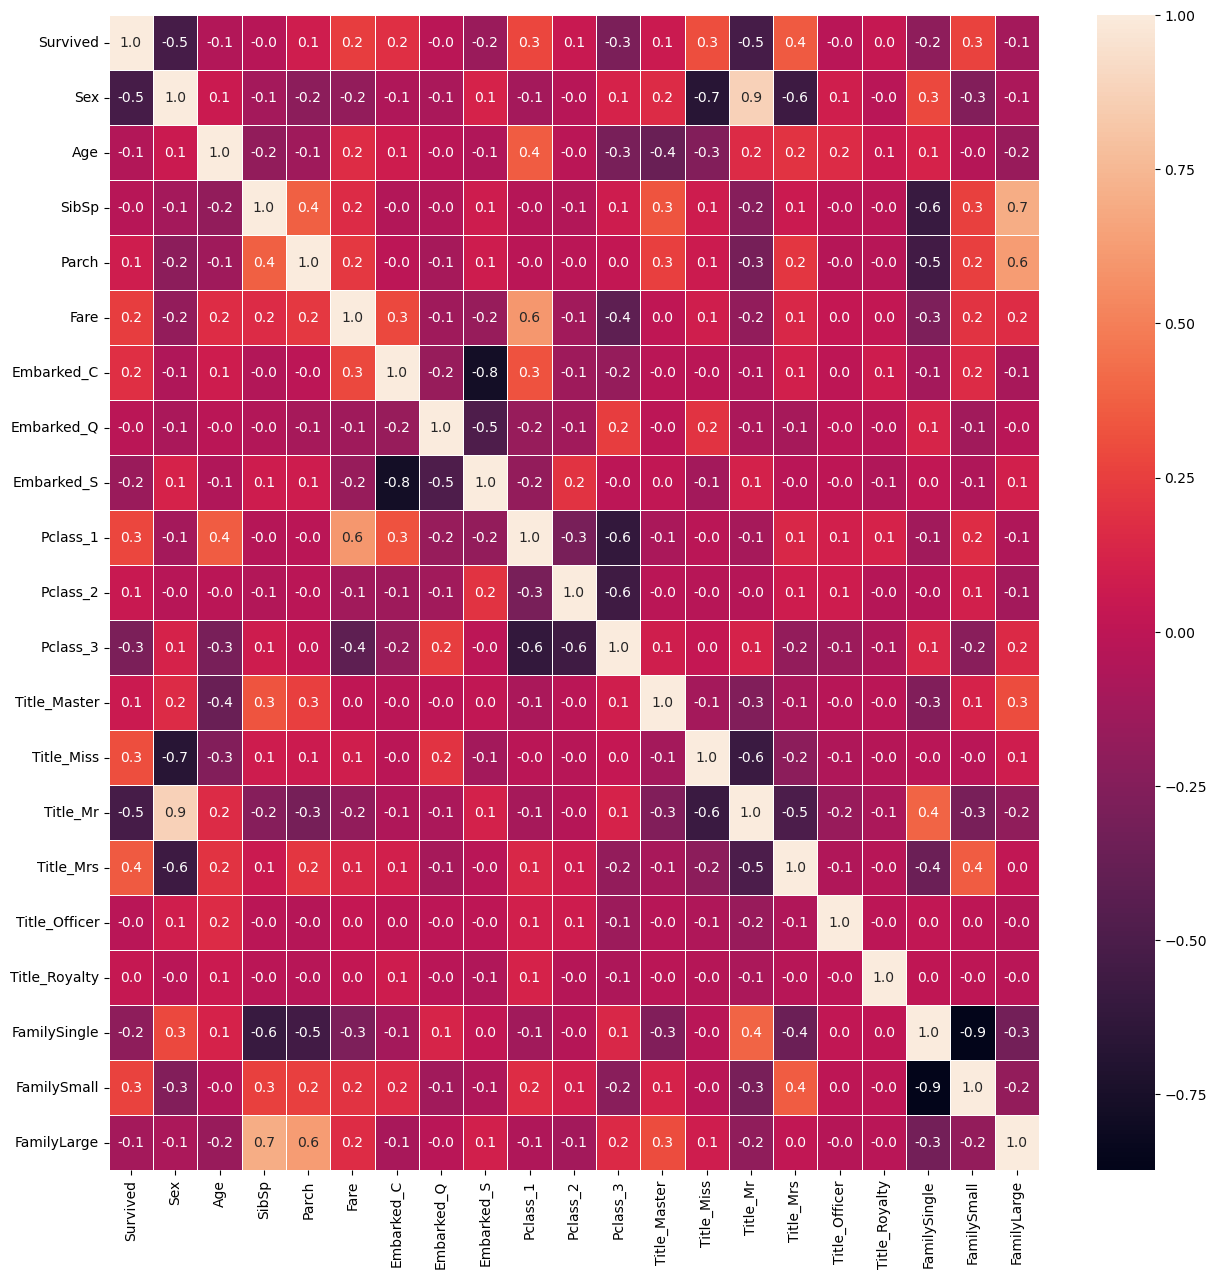

In [28]:
f, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(data_s.corr(), annot = True, linewidths = 0.5, fmt = '.1f', ax = ax)

### 主成分分析

In [29]:
# Data Preparation
z_scaler = preprocessing.StandardScaler()
data_s = z_scaler.fit_transform(data_s)

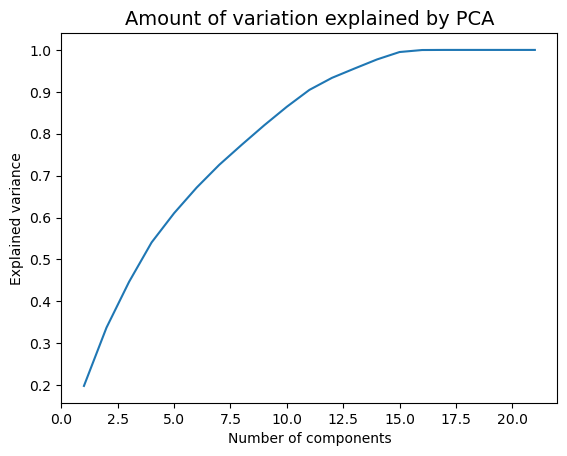

Number of components explaining 80% of variance: 9
Number of components explaining 90% of variance: 11
Number of components explaining 99% of variance: 15


In [31]:
# Fitting PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(data_s)
explained_var = np.cumsum(pca.explained_variance_ratio_)

# Plotting the amount of variation explained by PCA with different numbers of components
plt.plot(list(range(1, len(explained_var)+1)), explained_var)
plt.title('Amount of variation explained by PCA', fontsize = 14)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

print("Number of components explaining 80% of variance:", np.where(explained_var > 0.8)[0][0] + 1)
print("Number of components explaining 90% of variance:", np.where(explained_var > 0.9)[0][0] + 1)
print("Number of components explaining 99% of variance:", np.where(explained_var > 0.99)[0][0] + 1)